In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [3]:
X, y  = mnist.data, mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

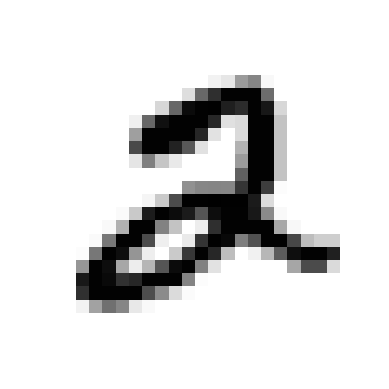

In [6]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")
some_digit = X[5]
plot_digit(some_digit)
plt.show()

In [7]:
y[5]

'2'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_2 = (y_train == '2')  # True for all 5s, False for all other digits
y_test_2 = (y_test == '2')

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring='accuracy')

array([0.96645, 0.95895, 0.904  ])

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_2)
print(any(dummy_clf.predict(X_train)))

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_2, cv=3, scoring='accuracy')

array([0.9007, 0.9007, 0.9007])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
                                      # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_2):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_2[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_2[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.96645
0.95895
0.904


In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_train_2, y_train_pred)
cm

array([[51538,  2504],
       [  908,  5050]])

In [21]:
y_train_perfect_predictions = y_train_2  # pretend we reached perfection
confusion_matrix(y_train_2, y_train_perfect_predictions)

array([[54042,     0],
       [    0,  5958]])

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
precision_score(y_train_2, y_train_pred)  #== 3530 / (687 + 3530)

0.6685199894095843

In [24]:
recall_score(y_train_2, y_train_pred) # == 3530 / (1891 + 3530)

0.8475998657267539

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(y_train_2, y_train_pred)

0.7474837181764358

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4616.86417714])

In [28]:
threshhold = 0
y_some_digit_pred = (y_scores > threshhold)
y_some_digit_pred

array([ True])

In [29]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, method='decision_function')

In [31]:
y_scores

array([-36851.09465219, -31272.70892659, -21491.02754016, ...,
       -30052.05804538, -18789.24492043, -20051.24297549])

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

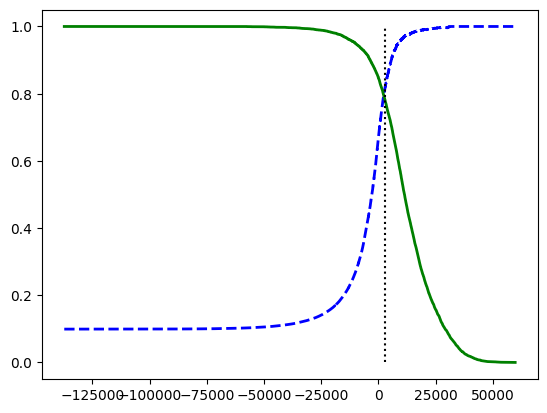

In [34]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show()

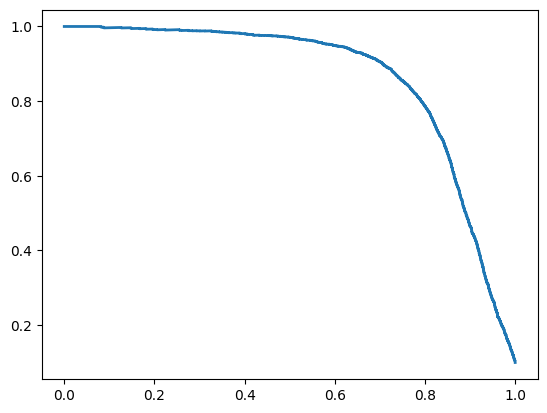

In [35]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [36]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(5585.140261597363)

In [37]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [38]:
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [39]:
precision_score(y_train_2, y_train_pred_90)

0.9000641985876311

In [40]:
recall_at_90_precision = recall_score(y_train_2, y_train_pred_90)
recall_at_90_precision

0.7059415911379657

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

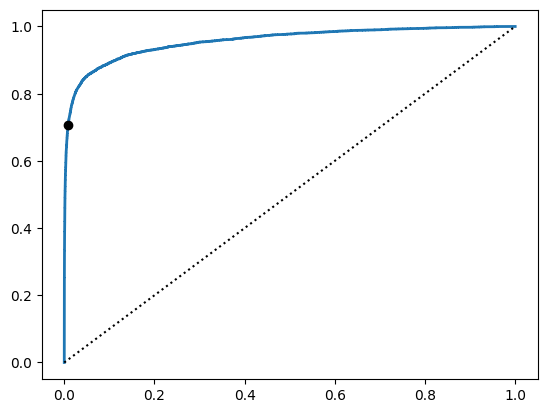

In [43]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_train_2, y_scores)

np.float64(0.9568395257681235)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest_clf = RandomForestClassifier(random_state=42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3, method='predict_proba')

In [53]:
y_probas_forest[:5]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [55]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_2, y_scores_forest
)

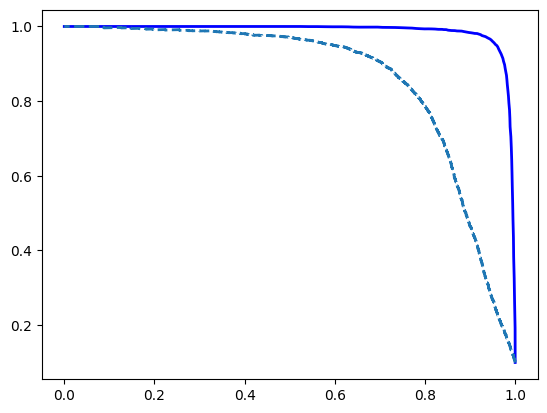

In [56]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
[...]  # beautify the figure: add labels, grid, and legend
plt.show()

In [59]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.05
roc_auc_score(y_train_2, y_scores_forest)

np.float64(0.9976087190102003)

In [60]:
from sklearn.svm import SVC

In [63]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [64]:
svm_clf.predict([some_digit])

array(['2'], dtype=object)

In [66]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.84, -0.29,  9.3 ,  5.1 ,  1.76,  6.13,  0.74,  2.81,  7.2 ,
         8.25]])

In [67]:
class_id = some_digit_scores.argmax()
class_id

np.int64(2)

In [70]:
print(svm_clf.classes_)
print(svm_clf.classes_[class_id])

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
2


In [71]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [72]:
ovr_clf.predict([some_digit])

array(['2'], dtype='<U1')

In [73]:
len(ovr_clf.estimators_)

10

In [75]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['2'], dtype='<U1')

In [77]:
sgd_clf.decision_function([some_digit]).round()

array([[-15542., -29287.,   3512.,  -6832., -19313.,  -9222., -33451.,
        -21326.,  -2297.,  -6958.]])

In [78]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

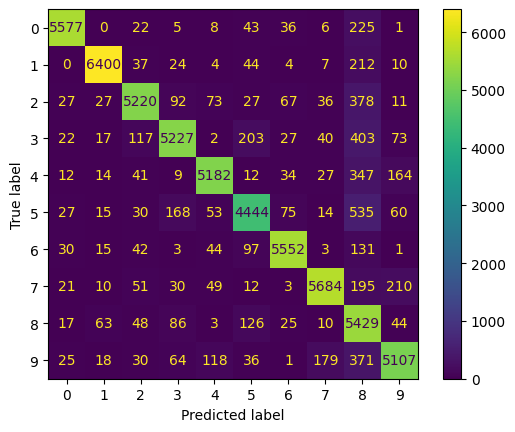

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

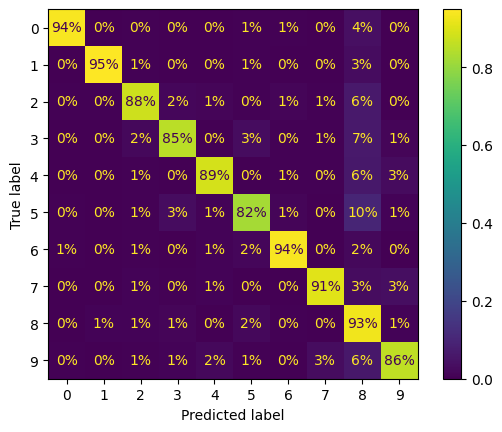

In [84]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
normalize="true", values_format=".0%")
plt.show()

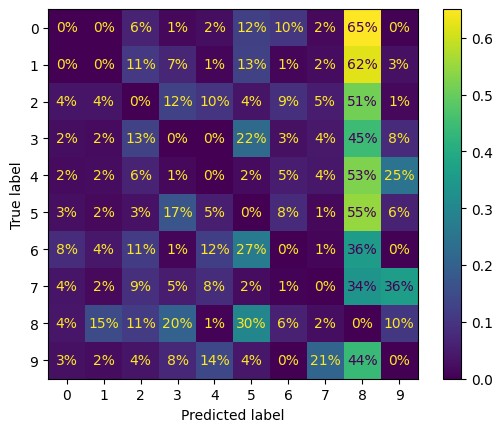

In [85]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                      sample_weight=sample_weight,
                                      normalize="true", values_format=".0%")
plt.show()

In [89]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [92]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') == 2)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [93]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [94]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [95]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [96]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9692827815797473

In [97]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [98]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [99]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

In [100]:
y_train_mod = X_train
y_test_mod = X_test

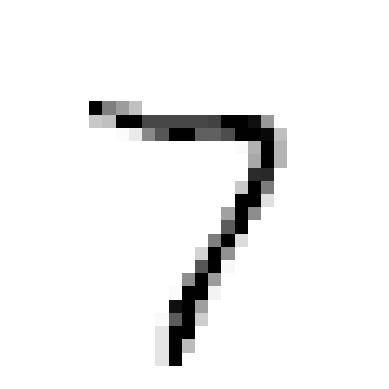

In [102]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()